In [44]:
# # ESTE SISTEMA FUNCIONA/TEM COMPATIBILIDADE COM O PYTHON 3.12.2, se não o possuir, instale-o:
# # https://www.python.org/ftp/python/3.12.2/python-3.12.2-amd64.exe

# # Se a máquina não possuir os pacotes, instale-os
# pip install --upgrade pip setuptools distlib tensorflow pandas seaborn geopandas plotly numpy requests unidecode matplotlib statsmodels scipy scikit-learn shap networkx imbalanced-learn streamlit

In [45]:
# pip install setuptools

In [46]:
# pip install tensorflow

In [47]:
# pip install openpyxl

In [48]:
# pip install nbformat>=4.2.0

# **Sistema - Ágio e Ágio Interno**

In [91]:
import pandas as pd
import seaborn as sns
import re 
import os
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px
import numpy as np
import time
import requests
import json
from unidecode import unidecode
import unicodedata
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import shap
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import ttest_ind, f_oneway
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import networkx as nx
import plotly.graph_objects as go
from statsmodels.api import OLS, add_constant
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import streamlit as st
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, BatchNormalization, Dropout
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from shapely.geometry import Point

## **Leitura da Base**

In [50]:
# Carregando o arquivo Excel
casos = pd.read_excel("Casos de interesse.xlsx", sheet_name = "Ágio")

# Exibindo as primeiras linhas do arquivo
casos.head()

,Contribuinte,Natureza,Número do Processo,1ª Instância,2ª Instância,STF/STJ,Movimentações,Status,Data Liminar/Tutela,Mérito Liminar/Tutela,Sentença,Mérito na Sentença,Acórdão,Mérito no Acórdão,Cidade,Empresa-Veículo
0,Kimberly-Clark,Ação Anulatória,5028418-41.2018.4.03.6100,13ª Vara,TRF3,NaN,30/09/2024 14:36:26 - Conclusos para julgament...,NaN,19.11.2018,Favorável,_,_,_,_,São Paulo - SP,Sim
1,Aché,Embargos à Execução Fiscal,5009958-51.2018.4.03.6182,5ª Vara de Execuções Fiscais Federal de São Paulo,NaN,NaN,09/08/2024 14:28:19 - Conclusos para julgament...,Despachado,04.06.2020,Desfavorável,21.06.2020,Favorável,13.10.2021,Favorável,São Paulo - SP,Sim
2,AES Tietê Energia,Ação Anulatória,1000365-27.2018.4.01.3400,6ª Vara SJDF,NaN,NaN,06/11/2024 15:59:39 - Juntada de manifestação\...,Aguardando prolação de sentença,13.11.2018,Desfavorável,29.10.2018,Favorável,NaN,NaN,Brasília - DF,Sim
3,Man Latin America,Ação Anulatória,5020207-16.2018.4.03.6100,1ª Vara da JF/SP,3ª Turma,NaN,10/10/2024 11:47:29 - Juntada de Petição de pe...,NaN,14.08.2018,Desfavorável,07.05.2020,Desfavorável,_,_,São Paulo - SP,Sim
4,PPG Industrial do Brasil,Ação Anulatória com pedido de Tutela Cautelar ...,5003132-80.2017.4.03.6105,5ª Vara da Subseção Judiciária de Campinas/SP,4ª Turma,NaN,30/01/2023 20:48:09 - Juntada de Petição de pe...,NaN,13.07.2017,Favorável,27.03.2019,Desfavorável,_,_,Campinas - SP,Não


In [51]:
casos.shape

(46, 16)

In [52]:
casos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Contribuinte           46 non-null     object
 1   Natureza               45 non-null     object
 2   Número do Processo     46 non-null     object
 3   1ª Instância           37 non-null     object
 4   2ª Instância           34 non-null     object
 5   STF/STJ                5 non-null      object
 6   Movimentações          46 non-null     object
 7   Status                 11 non-null     object
 8   Data Liminar/Tutela    32 non-null     object
 9   Mérito Liminar/Tutela  32 non-null     object
 10  Sentença               21 non-null     object
 11  Mérito na Sentença     21 non-null     object
 12  Acórdão                14 non-null     object
 13  Mérito no Acórdão      13 non-null     object
 14  Cidade                 39 non-null     object
 15  Empresa-Veículo        46

## **Tratamento da Base**

### **Tratamento 1: Transformando Datas em Formato Datetime**

In [53]:
# Certifique-se de que a coluna 'Data Liminar/Tutela' está no formato datetime
casos['Data Liminar/Tutela'] = pd.to_datetime(casos['Data Liminar/Tutela'], errors = 'coerce')

# Certifique-se de que a coluna 'Sentença' está no formato datetime
casos['Sentença'] = pd.to_datetime(casos['Sentença'], errors = 'coerce')

# Certifique-se de que a coluna 'Acordão' está no formato datetime
casos['Acórdão'] = pd.to_datetime(casos['Acórdão'], errors = 'coerce')

C:\Users\pietra.araujo\AppData\Local\Temp\ipykernel_13584\196115201.py:2: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\pietra.araujo\AppData\Local\Temp\ipykernel_13584\196115201.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\pietra.araujo\AppData\Local\Temp\ipykernel_13584\196115201.py:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [54]:
# Verificando o tipo de dado das colunas
print(casos.dtypes)

# Exibindo as primeiras linhas para garantir que a conversão ocorreu
print(casos[['Data Liminar/Tutela', 'Sentença', 'Acórdão']].head())

Contribuinte                     object
Natureza                         object
Número do Processo               object
1ª Instância                     object
2ª Instância                     object
STF/STJ                          object
Movimentações                    object
Status                           object
Data Liminar/Tutela      datetime64[ns]
Mérito Liminar/Tutela            object
Sentença                 datetime64[ns]
Mérito na Sentença               object
Acórdão                  datetime64[ns]
Mérito no Acórdão                object
Cidade                           object
Empresa-Veículo                  object
dtype: object
  Data Liminar/Tutela   Sentença    Acórdão
0          2018-11-19        NaT        NaT
1          2020-06-04 2020-06-21 2021-10-13
2          2018-11-13 2018-10-29        NaT
3          2018-08-14 2020-07-05        NaT
4          2017-07-13 2019-03-27        NaT


### **Tratamento 2: Preenchendo os Valores Nulos**

In [55]:
# Preencher os valores vazios/nulos por "Vazio"
valores_inconsistentes = ["_", "N/A", None, np.nan]
casos.replace(valores_inconsistentes, np.nan, inplace=True)
casos.fillna("Vazio", inplace=True)
casos.head()

C:\Users\pietra.araujo\AppData\Local\Temp\ipykernel_13584\2186750178.py:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Vazio' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.



,Contribuinte,Natureza,Número do Processo,1ª Instância,2ª Instância,STF/STJ,Movimentações,Status,Data Liminar/Tutela,Mérito Liminar/Tutela,Sentença,Mérito na Sentença,Acórdão,Mérito no Acórdão,Cidade,Empresa-Veículo
0,Kimberly-Clark,Ação Anulatória,5028418-41.2018.4.03.6100,13ª Vara,TRF3,Vazio,30/09/2024 14:36:26 - Conclusos para julgament...,Vazio,2018-11-19 00:00:00,Favorável,Vazio,Vazio,Vazio,Vazio,São Paulo - SP,Sim
1,Aché,Embargos à Execução Fiscal,5009958-51.2018.4.03.6182,5ª Vara de Execuções Fiscais Federal de São Paulo,Vazio,Vazio,09/08/2024 14:28:19 - Conclusos para julgament...,Despachado,2020-06-04 00:00:00,Desfavorável,2020-06-21 00:00:00,Favorável,2021-10-13 00:00:00,Favorável,São Paulo - SP,Sim
2,AES Tietê Energia,Ação Anulatória,1000365-27.2018.4.01.3400,6ª Vara SJDF,Vazio,Vazio,06/11/2024 15:59:39 - Juntada de manifestação\...,Aguardando prolação de sentença,2018-11-13 00:00:00,Desfavorável,2018-10-29 00:00:00,Favorável,Vazio,Vazio,Brasília - DF,Sim
3,Man Latin America,Ação Anulatória,5020207-16.2018.4.03.6100,1ª Vara da JF/SP,3ª Turma,Vazio,10/10/2024 11:47:29 - Juntada de Petição de pe...,Vazio,2018-08-14 00:00:00,Desfavorável,2020-07-05 00:00:00,Desfavorável,Vazio,Vazio,São Paulo - SP,Sim
4,PPG Industrial do Brasil,Ação Anulatória com pedido de Tutela Cautelar ...,5003132-80.2017.4.03.6105,5ª Vara da Subseção Judiciária de Campinas/SP,4ª Turma,Vazio,30/01/2023 20:48:09 - Juntada de Petição de pe...,Vazio,2017-07-13 00:00:00,Favorável,2019-03-27 00:00:00,Desfavorável,Vazio,Vazio,Campinas - SP,Não


### **Tratamento 3: Ajustando "Número do Processo"**

In [56]:
# Remove pontos e traços da coluna 'Número do Processo'
casos['Número do Processo'] = casos['Número do Processo'].str.replace(r'[.-]', '', regex = True)
casos.head()

,Contribuinte,Natureza,Número do Processo,1ª Instância,2ª Instância,STF/STJ,Movimentações,Status,Data Liminar/Tutela,Mérito Liminar/Tutela,Sentença,Mérito na Sentença,Acórdão,Mérito no Acórdão,Cidade,Empresa-Veículo
0,Kimberly-Clark,Ação Anulatória,50284184120184036100,13ª Vara,TRF3,Vazio,30/09/2024 14:36:26 - Conclusos para julgament...,Vazio,2018-11-19 00:00:00,Favorável,Vazio,Vazio,Vazio,Vazio,São Paulo - SP,Sim
1,Aché,Embargos à Execução Fiscal,50099585120184036182,5ª Vara de Execuções Fiscais Federal de São Paulo,Vazio,Vazio,09/08/2024 14:28:19 - Conclusos para julgament...,Despachado,2020-06-04 00:00:00,Desfavorável,2020-06-21 00:00:00,Favorável,2021-10-13 00:00:00,Favorável,São Paulo - SP,Sim
2,AES Tietê Energia,Ação Anulatória,10003652720184013400,6ª Vara SJDF,Vazio,Vazio,06/11/2024 15:59:39 - Juntada de manifestação\...,Aguardando prolação de sentença,2018-11-13 00:00:00,Desfavorável,2018-10-29 00:00:00,Favorável,Vazio,Vazio,Brasília - DF,Sim
3,Man Latin America,Ação Anulatória,50202071620184036100,1ª Vara da JF/SP,3ª Turma,Vazio,10/10/2024 11:47:29 - Juntada de Petição de pe...,Vazio,2018-08-14 00:00:00,Desfavorável,2020-07-05 00:00:00,Desfavorável,Vazio,Vazio,São Paulo - SP,Sim
4,PPG Industrial do Brasil,Ação Anulatória com pedido de Tutela Cautelar ...,50031328020174036105,5ª Vara da Subseção Judiciária de Campinas/SP,4ª Turma,Vazio,30/01/2023 20:48:09 - Juntada de Petição de pe...,Vazio,2017-07-13 00:00:00,Favorável,2019-03-27 00:00:00,Desfavorável,Vazio,Vazio,Campinas - SP,Não


### **Tratamento 4: Ajustando "Cidade"**

In [57]:
# Usar regex para remover o hífen e a sigla do Estado
casos['comarca'] = casos['Cidade'].str.replace(r' - \w{2}$', '', regex = True)
casos.head()

,Contribuinte,Natureza,Número do Processo,1ª Instância,2ª Instância,STF/STJ,Movimentações,Status,Data Liminar/Tutela,Mérito Liminar/Tutela,Sentença,Mérito na Sentença,Acórdão,Mérito no Acórdão,Cidade,Empresa-Veículo,comarca
0,Kimberly-Clark,Ação Anulatória,50284184120184036100,13ª Vara,TRF3,Vazio,30/09/2024 14:36:26 - Conclusos para julgament...,Vazio,2018-11-19 00:00:00,Favorável,Vazio,Vazio,Vazio,Vazio,São Paulo - SP,Sim,São Paulo
1,Aché,Embargos à Execução Fiscal,50099585120184036182,5ª Vara de Execuções Fiscais Federal de São Paulo,Vazio,Vazio,09/08/2024 14:28:19 - Conclusos para julgament...,Despachado,2020-06-04 00:00:00,Desfavorável,2020-06-21 00:00:00,Favorável,2021-10-13 00:00:00,Favorável,São Paulo - SP,Sim,São Paulo
2,AES Tietê Energia,Ação Anulatória,10003652720184013400,6ª Vara SJDF,Vazio,Vazio,06/11/2024 15:59:39 - Juntada de manifestação\...,Aguardando prolação de sentença,2018-11-13 00:00:00,Desfavorável,2018-10-29 00:00:00,Favorável,Vazio,Vazio,Brasília - DF,Sim,Brasília
3,Man Latin America,Ação Anulatória,50202071620184036100,1ª Vara da JF/SP,3ª Turma,Vazio,10/10/2024 11:47:29 - Juntada de Petição de pe...,Vazio,2018-08-14 00:00:00,Desfavorável,2020-07-05 00:00:00,Desfavorável,Vazio,Vazio,São Paulo - SP,Sim,São Paulo
4,PPG Industrial do Brasil,Ação Anulatória com pedido de Tutela Cautelar ...,50031328020174036105,5ª Vara da Subseção Judiciária de Campinas/SP,4ª Turma,Vazio,30/01/2023 20:48:09 - Juntada de Petição de pe...,Vazio,2017-07-13 00:00:00,Favorável,2019-03-27 00:00:00,Desfavorável,Vazio,Vazio,Campinas - SP,Não,Campinas


## **Feature Engineering: Obtendo a duração dos processos**

In [58]:
# Função para extrair o ano do "Número do Processo"
def extrair_ano(num_proc):
    try:
        ano = int(num_proc[9:13])  # Extrai o ano presumido
        if 1900 <= ano <= 2100:  # Valida se o ano está dentro de um intervalo plausível
            return ano
        else:
            return np.nan  # Retorna NaN para anos fora do intervalo esperado
    except (ValueError, TypeError):
        return np.nan  # Retorna NaN para valores inválidos

# Aplicar a função para extrair o ano do processo
casos['ano_processo'] = casos['Número do Processo'].apply(extrair_ano)

# Criar a data presumida com base no ano extraído
casos['data_presumida'] = pd.to_datetime(casos['ano_processo'], format='%Y', errors='coerce')

# Certifique-se de que 'Data Liminar/Tutela' está no formato datetime
casos['Data Liminar/Tutela'] = pd.to_datetime(casos['Data Liminar/Tutela'], errors='coerce')

# Verifique se ambas as colunas estão no formato correto
print(casos[['Data Liminar/Tutela', 'data_presumida']].dtypes)

# Calcular o tempo em meses (apenas para linhas válidas)
casos['tempo_meses'] = (
    (casos['Data Liminar/Tutela'] - casos['data_presumida'])
    .dt.days / 30.44  # Converte dias em meses
)
casos.head()

Data Liminar/Tutela    datetime64[ns]
data_presumida         datetime64[ns]
dtype: object


,Contribuinte,Natureza,Número do Processo,1ª Instância,2ª Instância,STF/STJ,Movimentações,Status,Data Liminar/Tutela,Mérito Liminar/Tutela,Sentença,Mérito na Sentença,Acórdão,Mérito no Acórdão,Cidade,Empresa-Veículo,comarca,ano_processo,data_presumida,tempo_meses
0,Kimberly-Clark,Ação Anulatória,50284184120184036100,13ª Vara,TRF3,Vazio,30/09/2024 14:36:26 - Conclusos para julgament...,Vazio,2018-11-19,Favorável,Vazio,Vazio,Vazio,Vazio,São Paulo - SP,Sim,São Paulo,2018,2018-01-01,10.578187
1,Aché,Embargos à Execução Fiscal,50099585120184036182,5ª Vara de Execuções Fiscais Federal de São Paulo,Vazio,Vazio,09/08/2024 14:28:19 - Conclusos para julgament...,Despachado,2020-06-04,Desfavorável,2020-06-21 00:00:00,Favorável,2021-10-13 00:00:00,Favorável,São Paulo - SP,Sim,São Paulo,2018,2018-01-01,29.073587
2,AES Tietê Energia,Ação Anulatória,10003652720184013400,6ª Vara SJDF,Vazio,Vazio,06/11/2024 15:59:39 - Juntada de manifestação\...,Aguardando prolação de sentença,2018-11-13,Desfavorável,2018-10-29 00:00:00,Favorável,Vazio,Vazio,Brasília - DF,Sim,Brasília,2018,2018-01-01,10.381078
3,Man Latin America,Ação Anulatória,50202071620184036100,1ª Vara da JF/SP,3ª Turma,Vazio,10/10/2024 11:47:29 - Juntada de Petição de pe...,Vazio,2018-08-14,Desfavorável,2020-07-05 00:00:00,Desfavorável,Vazio,Vazio,São Paulo - SP,Sim,São Paulo,2018,2018-01-01,7.391590
4,PPG Industrial do Brasil,Ação Anulatória com pedido de Tutela Cautelar ...,50031328020174036105,5ª Vara da Subseção Judiciária de Campinas/SP,4ª Turma,Vazio,30/01/2023 20:48:09 - Juntada de Petição de pe...,Vazio,2017-07-13,Favorável,2019-03-27 00:00:00,Desfavorável,Vazio,Vazio,Campinas - SP,Não,Campinas,2017,2017-01-01,6.340342


## **Bases Externas: Obtendo novas colunas**

### **Geometria das Comarcas**

In [59]:
# URL direta para o arquivo bruto
url_raw = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-100-mun.json"

# Carregar o GeoJSON diretamente
comarcas = gpd.read_file(url_raw)

# Renomear a coluna "name" para "comarca"
comarcas = comarcas.rename(columns={"name": "comarca"})

# Mostrar as primeiras linhas do DataFrame
comarcas.head()

,id,comarca,description,geometry
0,1100015,Alta Floresta D'Oeste,Alta Floresta D'Oeste,"POLYGON ((-62.18209 -11.86686, -62.1623 -11.87..."
1,1100023,Ariquemes,Ariquemes,"POLYGON ((-62.53595 -9.73182, -62.50782 -9.754..."
2,1100031,Cabixi,Cabixi,"POLYGON ((-60.3994 -13.45584, -60.40195 -13.46..."
3,1100049,Cacoal,Cacoal,"POLYGON ((-61.00051 -11.39796, -61.01794 -11.4..."
4,1100056,Cerejeiras,Cerejeiras,"POLYGON ((-61.50047 -13.00392, -61.47901 -13.0..."


In [60]:
# Obter as coordenadas geográficas de cada comarca
comarcas['latitude'] = comarcas['geometry'].centroid.y
comarcas['longitude'] = comarcas['geometry'].centroid.x
comarcas.head()

C:\Users\pietra.araujo\AppData\Local\Temp\ipykernel_13584\2960086291.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\pietra.araujo\AppData\Local\Temp\ipykernel_13584\2960086291.py:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




,id,comarca,description,geometry,latitude,longitude
0,1100015,Alta Floresta D'Oeste,Alta Floresta D'Oeste,"POLYGON ((-62.18209 -11.86686, -62.1623 -11.87...",-12.469633,-62.274095
1,1100023,Ariquemes,Ariquemes,"POLYGON ((-62.53595 -9.73182, -62.50782 -9.754...",-9.951564,-62.956923
2,1100031,Cabixi,Cabixi,"POLYGON ((-60.3994 -13.45584, -60.40195 -13.46...",-13.474432,-60.639192
3,1100049,Cacoal,Cacoal,"POLYGON ((-61.00051 -11.39796, -61.01794 -11.4...",-11.300812,-61.324237
4,1100056,Cerejeiras,Cerejeiras,"POLYGON ((-61.50047 -13.00392, -61.47901 -13.0...",-13.203228,-61.260380


In [61]:
# Contar as aparições de cada comarca na base "casos"
contagens = casos['comarca'].value_counts().reset_index()
contagens.columns = ['comarca', 'aparições_comarca']  # Renomear as colunas

# Mesclar as contagens com o DataFrame "comarcas"
comarcas = comarcas.merge(contagens, on = 'comarca', how = 'left')

# Preencher valores ausentes com zero
comarcas['aparições_comarca'] = comarcas['aparições_comarca'].fillna('Vazio').astype(str)

# Verificar o resultado
comarcas.head()

,id,comarca,description,geometry,latitude,longitude,aparições_comarca
0,1100015,Alta Floresta D'Oeste,Alta Floresta D'Oeste,"POLYGON ((-62.18209 -11.86686, -62.1623 -11.87...",-12.469633,-62.274095,Vazio
1,1100023,Ariquemes,Ariquemes,"POLYGON ((-62.53595 -9.73182, -62.50782 -9.754...",-9.951564,-62.956923,Vazio
2,1100031,Cabixi,Cabixi,"POLYGON ((-60.3994 -13.45584, -60.40195 -13.46...",-13.474432,-60.639192,Vazio
3,1100049,Cacoal,Cacoal,"POLYGON ((-61.00051 -11.39796, -61.01794 -11.4...",-11.300812,-61.324237,Vazio
4,1100056,Cerejeiras,Cerejeiras,"POLYGON ((-61.50047 -13.00392, -61.47901 -13.0...",-13.203228,-61.260380,Vazio


In [62]:
# Transforma os valores da coluna 'comarca' para maiúsculas e sem acento
def normalizar_comarca(comarca):
    return unidecode(comarca).upper() if isinstance(comarca, str) else comarca

casos["comarca"] = casos["comarca"].apply(normalizar_comarca)
comarcas["comarca"] = comarcas["comarca"].apply(normalizar_comarca)
comarcas["description"] = comarcas["description"].apply(normalizar_comarca)

In [63]:
# Realizar o merge entre 'casos' e 'df' usando a coluna 'comarca'
casos = casos.merge(comarcas, on = "comarca", how = "left")
casos.head()

,Contribuinte,Natureza,Número do Processo,1ª Instância,2ª Instância,STF/STJ,Movimentações,Status,Data Liminar/Tutela,Mérito Liminar/Tutela,...,comarca,ano_processo,data_presumida,tempo_meses,id,description,geometry,latitude,longitude,aparições_comarca
0,Kimberly-Clark,Ação Anulatória,50284184120184036100,13ª Vara,TRF3,Vazio,30/09/2024 14:36:26 - Conclusos para julgament...,Vazio,2018-11-19,Favorável,...,SAO PAULO,2018,2018-01-01,10.578187,3550308,SAO PAULO,"POLYGON ((-46.53723 -23.36918, -46.54499 -23.3...",-23.650225,-46.648013,17.0
1,Aché,Embargos à Execução Fiscal,50099585120184036182,5ª Vara de Execuções Fiscais Federal de São Paulo,Vazio,Vazio,09/08/2024 14:28:19 - Conclusos para julgament...,Despachado,2020-06-04,Desfavorável,...,SAO PAULO,2018,2018-01-01,29.073587,3550308,SAO PAULO,"POLYGON ((-46.53723 -23.36918, -46.54499 -23.3...",-23.650225,-46.648013,17.0
2,AES Tietê Energia,Ação Anulatória,10003652720184013400,6ª Vara SJDF,Vazio,Vazio,06/11/2024 15:59:39 - Juntada de manifestação\...,Aguardando prolação de sentença,2018-11-13,Desfavorável,...,BRASILIA,2018,2018-01-01,10.381078,5300108,BRASILIA,"POLYGON ((-47.41396 -15.54773, -47.4118 -15.54...",-15.780699,-47.796772,15.0
3,Man Latin America,Ação Anulatória,50202071620184036100,1ª Vara da JF/SP,3ª Turma,Vazio,10/10/2024 11:47:29 - Juntada de Petição de pe...,Vazio,2018-08-14,Desfavorável,...,SAO PAULO,2018,2018-01-01,7.391590,3550308,SAO PAULO,"POLYGON ((-46.53723 -23.36918, -46.54499 -23.3...",-23.650225,-46.648013,17.0
4,PPG Industrial do Brasil,Ação Anulatória com pedido de Tutela Cautelar ...,50031328020174036105,5ª Vara da Subseção Judiciária de Campinas/SP,4ª Turma,Vazio,30/01/2023 20:48:09 - Juntada de Petição de pe...,Vazio,2017-07-13,Favorável,...,CAMPINAS,2017,2017-01-01,6.340342,3509502,CAMPINAS,"POLYGON ((-47.05813 -22.73542, -47.058 -22.738...",-22.883562,-47.043430,2.0


In [64]:
# Identificar as colunas geométricas
colunas_geom = casos.select_dtypes(include = 'geometry').columns

# Preencher NaN nas colunas geométricas com uma geometria válida (por exemplo, Point)
for col in colunas_geom:
    casos[col] = casos[col].fillna(Point(0, 0))  # Preenchendo com uma geometria Point(0, 0)

# Preencher NaN nas demais colunas com "Vazio"
casos = casos.fillna(value = "Vazio", inplace = False)
casos.head()

,Contribuinte,Natureza,Número do Processo,1ª Instância,2ª Instância,STF/STJ,Movimentações,Status,Data Liminar/Tutela,Mérito Liminar/Tutela,...,comarca,ano_processo,data_presumida,tempo_meses,id,description,geometry,latitude,longitude,aparições_comarca
0,Kimberly-Clark,Ação Anulatória,50284184120184036100,13ª Vara,TRF3,Vazio,30/09/2024 14:36:26 - Conclusos para julgament...,Vazio,2018-11-19 00:00:00,Favorável,...,SAO PAULO,2018,2018-01-01,10.578187,3550308,SAO PAULO,"POLYGON ((-46.53723 -23.36918, -46.54499 -23.3...",-23.650225,-46.648013,17.0
1,Aché,Embargos à Execução Fiscal,50099585120184036182,5ª Vara de Execuções Fiscais Federal de São Paulo,Vazio,Vazio,09/08/2024 14:28:19 - Conclusos para julgament...,Despachado,2020-06-04 00:00:00,Desfavorável,...,SAO PAULO,2018,2018-01-01,29.073587,3550308,SAO PAULO,"POLYGON ((-46.53723 -23.36918, -46.54499 -23.3...",-23.650225,-46.648013,17.0
2,AES Tietê Energia,Ação Anulatória,10003652720184013400,6ª Vara SJDF,Vazio,Vazio,06/11/2024 15:59:39 - Juntada de manifestação\...,Aguardando prolação de sentença,2018-11-13 00:00:00,Desfavorável,...,BRASILIA,2018,2018-01-01,10.381078,5300108,BRASILIA,"POLYGON ((-47.41396 -15.54773, -47.4118 -15.54...",-15.780699,-47.796772,15.0
3,Man Latin America,Ação Anulatória,50202071620184036100,1ª Vara da JF/SP,3ª Turma,Vazio,10/10/2024 11:47:29 - Juntada de Petição de pe...,Vazio,2018-08-14 00:00:00,Desfavorável,...,SAO PAULO,2018,2018-01-01,7.39159,3550308,SAO PAULO,"POLYGON ((-46.53723 -23.36918, -46.54499 -23.3...",-23.650225,-46.648013,17.0
4,PPG Industrial do Brasil,Ação Anulatória com pedido de Tutela Cautelar ...,50031328020174036105,5ª Vara da Subseção Judiciária de Campinas/SP,4ª Turma,Vazio,30/01/2023 20:48:09 - Juntada de Petição de pe...,Vazio,2017-07-13 00:00:00,Favorável,...,CAMPINAS,2017,2017-01-01,6.340342,3509502,CAMPINAS,"POLYGON ((-47.05813 -22.73542, -47.058 -22.738...",-22.883562,-47.04343,2.0


## **Análises e Mapeamento**

### **Estatísticas Descritivas**

In [65]:
# Limpando dados do DataFrame 'casos' (desconsiderando "Vazio" ou "VAZIO")
casos_cleaned = casos.replace(["Vazio", "VAZIO"], np.nan).dropna(how="all")

# Substituir valores NaN por "Vazio" no final do processamento
def replace_nan_with_vazio(df):
    return df.fillna("Vazio")

# Mapear valores categóricos para numéricos
def map_categorical_to_numeric(data, column, mapping):
    if column in data.columns:
        data[column] = data[column].map(mapping)
    return data

# Mapeamento de valores para colunas categóricas
mapping = {"Favorável": 1, "Parcialmente": 0.5, "Desfavorável": 0}
casos_cleaned = map_categorical_to_numeric(casos_cleaned, "Mérito Liminar/Tutela", mapping)
casos_cleaned = map_categorical_to_numeric(casos_cleaned, "Mérito na Sentença", mapping)
casos_cleaned = map_categorical_to_numeric(casos_cleaned, "Mérito no Acórdão", mapping)

# Mapeamento de valores para colunas categóricas
mapping = {"Sim": 1, "Não": 0}
casos_cleaned = map_categorical_to_numeric(casos_cleaned, "Empresa-Veículo", mapping)

# Para colunas com agrupamento, calcular os valores mais frequentes, média e mediana
def calculate_statistics_full(data, group_cols, target_col):
    grouped = data.groupby(group_cols)[target_col].value_counts().reset_index(name="Frequência")
    
    # Garantir que a coluna seja numérica para calcular média e mediana
    if data[target_col].dtype in [np.float64, np.int64]:
        grouped[f"{target_col}_media"] = data.groupby(group_cols)[target_col].mean().reset_index(drop=True)
        grouped[f"{target_col}_mediana"] = data.groupby(group_cols)[target_col].median().reset_index(drop=True)
    else:
        grouped[f"{target_col}_media"] = None
        grouped[f"{target_col}_mediana"] = None
    
    return replace_nan_with_vazio(grouped)

# Calcular métricas para Mérito Liminar/Tutela, Mérito na Sentença, Mérito no Acórdão e Empresa-Veículo
metrics_merito_liminar = calculate_statistics_full(
    casos_cleaned, ["comarca", "Contribuinte", "Natureza"], "Mérito Liminar/Tutela"
)
metrics_merito_sentenca = calculate_statistics_full(
    casos_cleaned, ["comarca", "Contribuinte", "Natureza"], "Mérito na Sentença"
)
metrics_merito_acordao = calculate_statistics_full(
    casos_cleaned, ["comarca", "Contribuinte", "Natureza"], "Mérito no Acórdão"
)
metrics_empresa_veiculo = calculate_statistics_full(
    casos_cleaned, ["comarca", "Contribuinte", "Natureza"], "Empresa-Veículo"
)

# Calcular os valores mais frequentes para Contribuinte, Natureza e ano_processo
contribuinte_full = replace_nan_with_vazio(casos_cleaned["Contribuinte"].value_counts().reset_index(name="Frequência"))
natureza_full = replace_nan_with_vazio(casos_cleaned["Natureza"].value_counts().reset_index(name="Frequência"))
ano_processo_full = replace_nan_with_vazio(casos_cleaned["ano_processo"].value_counts().reset_index(name="Frequência"))

# Calcular média para 'tempo_meses'
casos_cleaned["tempo_meses"] = pd.to_numeric(casos_cleaned["tempo_meses"], errors="coerce")
metrics_tempo_meses = replace_nan_with_vazio(casos_cleaned.groupby(["comarca", "Contribuinte", "Natureza"])[
    "tempo_meses"
].mean().reset_index(name="tempo_meses_media"))

C:\Users\pietra.araujo\AppData\Local\Temp\ipykernel_13584\2373499669.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [66]:
frequencia_contribuinte = contribuinte_full.sort_values(by = "Frequência", ascending = False)

print("Contribuintes Mais Frequentes")
frequencia_contribuinte

Contribuintes Mais Frequentes


,Contribuinte,Frequência
0,Qualicorp,6
1,XP Investimentos,4
2,Tokio Marine,3
3,Carrefour,2
4,Solenis do Brasil Químicas Ltda.,2
5,Banco Bradesco BBI S.A.,2
6,PPG Industrial do Brasil,2
7,Intercement,2
8,Ambev,1
9,Atacadão,1


In [67]:
frequencia_natureza = natureza_full.sort_values(by = "Frequência", ascending = False)

print("Natureza de Processos Mais Frequentes")
frequencia_natureza

Natureza de Processos Mais Frequentes


,Natureza,Frequência
0,Ação Anulatória,17
1,Agravo de Instrumento,8
2,Procedimento Comum,6
3,Ação Anulatória com pedido de Tutela Cautelar ...,2
4,Mandado de Segurança,2
5,Ação Declaratória,2
6,Apelação,1
7,Ação Anulatória de Débito Fiscal,1
8,Embargos à Execução Fiscal,1
9,Tutela Cautelar,1


In [68]:
frequencia_ano = ano_processo_full.sort_values(by = "Frequência", ascending = False)

print("Ano de Processos Mais Frequentes")
frequencia_ano

Ano de Processos Mais Frequentes


,ano_processo,Frequência
0,2018,24
1,2019,13
2,2017,5
3,2020,2
4,2016,1
5,2022,1


In [69]:
frequencia_merito_liminar = metrics_merito_liminar.sort_values(by = "Frequência", ascending = False)

print("Frequência, Média e Mediana de Aparições de 'Mérito Liminar/Tutela' por Comarca, Contribuinte e Natureza")
frequencia_merito_liminar

Frequência, Média e Mediana de Aparições de 'Mérito Liminar/Tutela' por Comarca, Contribuinte e Natureza


,comarca,Contribuinte,Natureza,Mérito Liminar/Tutela,Frequência,Mérito Liminar/Tutela_media,Mérito Liminar/Tutela_mediana
1,BRASILIA,Qualicorp,Ação Anulatória,1.0,3,1.0,1.0
0,BAURU,AB Brasil,Ação Anulatória,1.0,1,Vazio,Vazio
2,BRASILIA,Repsol,Ação Anulatória,1.0,1,Vazio,Vazio
3,BRASILIA,Telefônica,Mandado de Segurança,0.0,1,Vazio,Vazio
4,BRASILIA,Tokio Marine,Ação Anulatória,0.5,1,Vazio,Vazio
5,BRASILIA,XP Investimentos,Ação Declaratória,0.5,1,Vazio,Vazio
6,CAMPINAS,PPG Industrial do Brasil,Ação Anulatória com pedido de Tutela Cautelar ...,1.0,1,1.0,1.0
7,JARAGUA DO SUL,A.M.C. TÊXTIL LTDA.,Ação Anulatória,1.0,1,1.0,1.0
8,SAO PAULO,Ambev,Ação Anulatória,1.0,1,0.0,0.0
9,SAO PAULO,Atacadão,Ação Anulatória,1.0,1,Vazio,Vazio


In [70]:
frequencia_merito_sentenca = metrics_merito_sentenca.sort_values(by = "Frequência", ascending = False)

print("Frequência, Média e Mediana de Aparições de 'Mérito na Sentença' por Comarca, Contribuinte e Natureza")
frequencia_merito_sentenca

Frequência, Média e Mediana de Aparições de 'Mérito na Sentença' por Comarca, Contribuinte e Natureza


,comarca,Contribuinte,Natureza,Mérito na Sentença,Frequência,Mérito na Sentença_media,Mérito na Sentença_mediana
0,BARUERI,Ticket Serviços S.A.,Embargos à Execução,0.5,1,0.5,0.5
1,BRASILIA,AES Tietê Energia,Ação Anulatória,1.0,1,Vazio,Vazio
2,BRASILIA,Telefônica,Mandado de Segurança,0.0,1,Vazio,Vazio
3,JARAGUA DO SUL,A.M.C. TÊXTIL LTDA.,Ação Anulatória,1.0,1,1.0,1.0
4,SAO PAULO,Banco Bradesco BBI S.A.,Ação Anulatória de Débito Fiscal,0.5,1,Vazio,Vazio
5,SAO PAULO,Bunge Fertilizantes S.A.,Ação Anulatória,0.0,1,Vazio,Vazio
6,SAO PAULO,Camil,Tutela Cautelar,0.0,1,Vazio,Vazio
7,SAO PAULO,Indiana Seguros,Ação Anulatória,1.0,1,Vazio,Vazio
8,SAO PAULO,Man Latin America,Ação Anulatória,0.0,1,0.0,0.0


In [71]:
frequencia_merito_acordao = metrics_merito_acordao.sort_values(by = "Frequência", ascending = False)

print("Frequência, Média e Mediana de Aparições de 'Mérito no Acórdão' por Comarca, Contribuinte e Natureza")
frequencia_merito_acordao

Frequência, Média e Mediana de Aparições de 'Mérito no Acórdão' por Comarca, Contribuinte e Natureza


,comarca,Contribuinte,Natureza,Mérito no Acórdão,Frequência,Mérito no Acórdão_media,Mérito no Acórdão_mediana
0,SAO PAULO,Aché,Embargos à Execução Fiscal,1.0,1,Vazio,Vazio
1,SAO PAULO,Bunge Fertilizantes S.A.,Ação Anulatória,0.0,1,Vazio,Vazio
2,SAO PAULO,Sucocitrico Cutrale,Mandado de Segurança,0.0,1,Vazio,Vazio


In [72]:
frequencia_empresa_veiculo = metrics_empresa_veiculo.sort_values(by = "Frequência", ascending = False)

print("Frequência, Média e Mediana de Aparições de 'Empresa-Veículo' por Comarca, Contribuinte e Natureza")
frequencia_empresa_veiculo

Frequência, Média e Mediana de Aparições de 'Empresa-Veículo' por Comarca, Contribuinte e Natureza


,comarca,Contribuinte,Natureza,Empresa-Veículo,Frequência,Empresa-Veículo_media,Empresa-Veículo_mediana
11,BRASILIA,Tokio Marine,Agravo de Instrumento,1,2,1.0,1.0
7,BRASILIA,Qualicorp,Ação Anulatória,1,2,0.0,0.0
5,BRASILIA,Qualicorp,Agravo de Instrumento,1,2,0.666667,1.0
2,BAURU,Tilibra,Ação Anulatória com pedido de Tutela Cautelar ...,1,1,1.0,1.0
1,BAURU,AB Brasil,Ação Anulatória,0,1,0.0,0.0
0,BARUERI,Ticket Serviços S.A.,Embargos à Execução,1,1,1.0,1.0
4,BRASILIA,Intercement,Ação Anulatória,1,1,1.0,1.0
6,BRASILIA,Qualicorp,Agravo de Instrumento,0,1,0.666667,1.0
8,BRASILIA,Qualicorp,Ação Anulatória,0,1,1.0,1.0
9,BRASILIA,Repsol,Ação Anulatória,0,1,1.0,1.0


In [73]:
# Certifique-se de que a coluna 'tempo_meses_media' seja numérica
metrics_tempo_meses["tempo_meses_media"] = pd.to_numeric(metrics_tempo_meses["tempo_meses_media"], errors="coerce")

# Substituir valores NaN temporariamente por 0 (ou outro número válido para análise)
metrics_tempo_meses = metrics_tempo_meses.fillna(0)

# Ordenar pela coluna 'tempo_meses_media'
media_tempo_meses = metrics_tempo_meses.sort_values(by="tempo_meses_media", ascending=False)

# Restaurar valores NaN como "Vazio" após a ordenação, se necessário
media_tempo_meses["tempo_meses_media"] = media_tempo_meses["tempo_meses_media"].replace(0, "Vazio")

print("Média do Tempo em Meses por Comarca, Contribuinte e Natureza")
media_tempo_meses

Média do Tempo em Meses por Comarca, Contribuinte e Natureza


,comarca,Contribuinte,Natureza,tempo_meses_media
16,SAO PAULO,Aché,Embargos à Execução Fiscal,29.073587
18,SAO PAULO,Atacadão,Ação Anulatória,10.906702
27,SAO PAULO,Kimberly-Clark,Ação Anulatória,10.578187
3,BRASILIA,AES Tietê Energia,Ação Anulatória,10.381078
7,BRASILIA,Repsol,Ação Anulatória,9.888305
9,BRASILIA,Tokio Marine,Agravo de Instrumento,9.78975
25,SAO PAULO,Carrefour,Ação Anulatória,9.034166
22,SAO PAULO,CTEEP,Ação Anulatória,8.804205
10,BRASILIA,Tokio Marine,Ação Anulatória,7.851511
8,BRASILIA,Telefônica,Mandado de Segurança,7.424442


### **Gráficos**

#### Gráfico de Barras para os Top Contribuintes

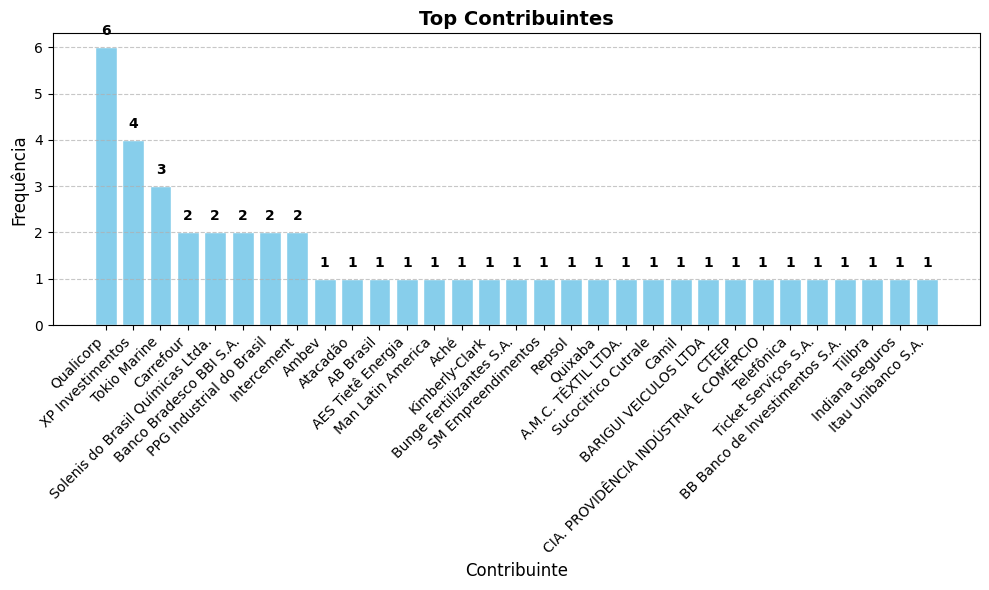

In [74]:
# Ajuste ao criar contribuinte_full
contribuinte_full = replace_nan_with_vazio(
    casos_cleaned["Contribuinte"].value_counts().reset_index(name="Frequência").rename(columns={"index": "Contribuinte"})
)

# Ordenar os dados para exibir os principais contribuintes
top_contribuintes = contribuinte_full.sort_values(by="Frequência", ascending=False)

# Criar o gráfico de barras com ajustes visuais
plt.figure(figsize=(10, 6))
plt.bar(top_contribuintes["Contribuinte"], top_contribuintes["Frequência"], color="skyblue", edgecolor="white")

# Adicionar título e rótulos
plt.title("Top Contribuintes", fontsize=14, fontweight="bold")
plt.xlabel("Contribuinte", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adicionar rótulos no topo das barras
for i, value in enumerate(top_contribuintes["Frequência"]):
    plt.text(i, value + 0.2, str(value), ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

#### Gráfico de Barras para Naturezas de Processo

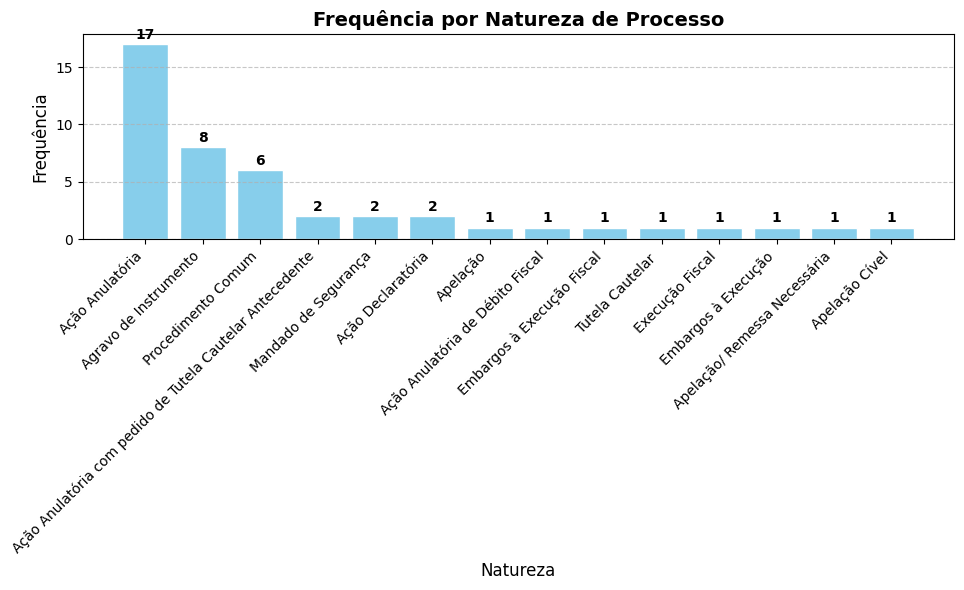

In [75]:
# Ajuste ao criar natureza_full
natureza_full = replace_nan_with_vazio(
    casos_cleaned["Natureza"].value_counts().reset_index(name="Frequência").rename(columns={"index": "Natureza"})
)

# Ordenar as naturezas para o gráfico
top_naturezas = natureza_full.sort_values(by="Frequência", ascending=False)

# Criar o gráfico de barras com ajustes visuais
plt.figure(figsize=(10, 6))
plt.bar(top_naturezas["Natureza"], top_naturezas["Frequência"], color="skyblue", edgecolor="white")

# Adicionar título e rótulos
plt.title("Frequência por Natureza de Processo", fontsize=14, fontweight="bold")
plt.xlabel("Natureza", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adicionar rótulos no topo das barras
for i, value in enumerate(top_naturezas["Frequência"]):
    plt.text(i, value + 0.2, str(value), ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

#### Gráfico de Pizza para Mérito Liminar/Tutela

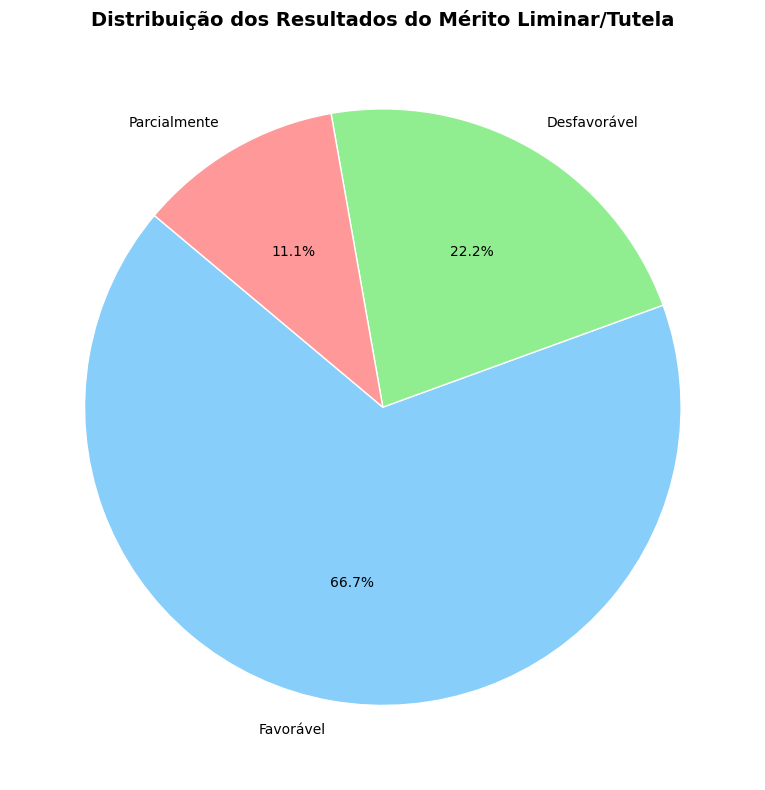

In [76]:
# Mapeamento reverso: de valores numéricos para rótulos
reverse_mapping = {1: "Favorável", 0.5: "Parcialmente", 0: "Desfavorável"}
metrics_merito_liminar["Mérito Liminar/Tutela_Label"] = metrics_merito_liminar["Mérito Liminar/Tutela"].map(reverse_mapping)

# Agrupar os dados pela nova coluna de rótulos
liminar_counts = metrics_merito_liminar["Mérito Liminar/Tutela_Label"].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    liminar_counts,
    labels=liminar_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=["#87CEFA", "#90EE90", "#FF9999"],  # Tons suaves: azul, verde claro, salmão
    wedgeprops={"edgecolor": "white"}  # Adicionar bordas brancas
)

# Adicionar título
plt.title("Distribuição dos Resultados do Mérito Liminar/Tutela", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

#### Gráfico de Pizza para Mérito no Acórdão

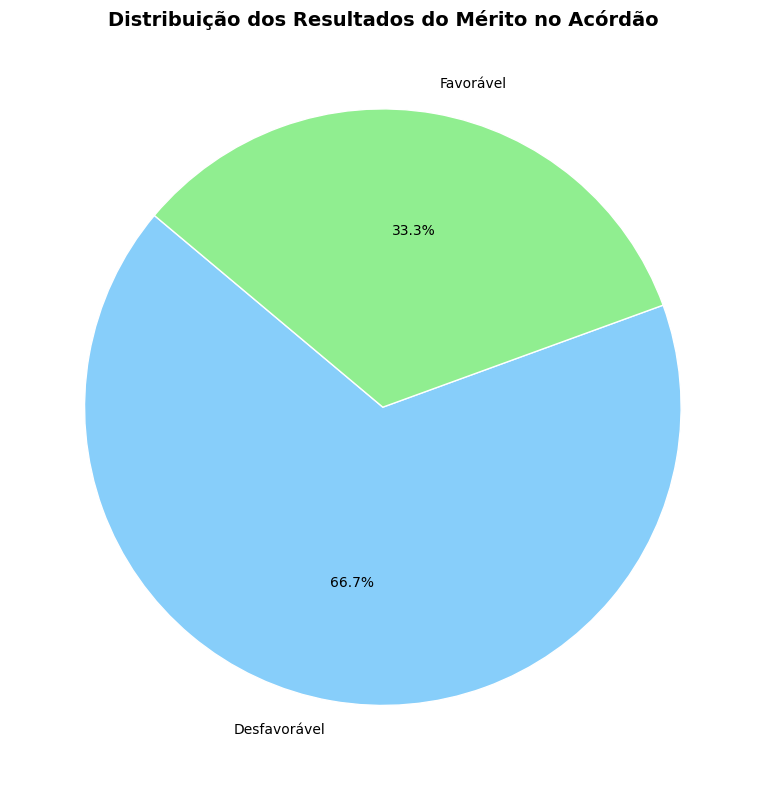

In [77]:
# Mapeamento reverso: de valores numéricos para rótulos
reverse_mapping = {1: "Favorável", 0.5: "Parcialmente", 0: "Desfavorável"}
metrics_merito_acordao["Mérito no Acórdão_Label"] = metrics_merito_acordao["Mérito no Acórdão"].map(reverse_mapping)

# Agrupar os dados pela nova coluna de rótulos
acordao_counts = metrics_merito_acordao["Mérito no Acórdão_Label"].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    acordao_counts,
    labels=acordao_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=["#87CEFA", "#90EE90", "#FF9999"],  # Tons suaves: azul, verde claro, salmão
    wedgeprops={"edgecolor": "white"}  # Adicionar bordas brancas para melhor visualização
)

# Adicionar título estilizado
plt.title("Distribuição dos Resultados do Mérito no Acórdão", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

#### Gráfico de Pizza para Mérito na Sentença

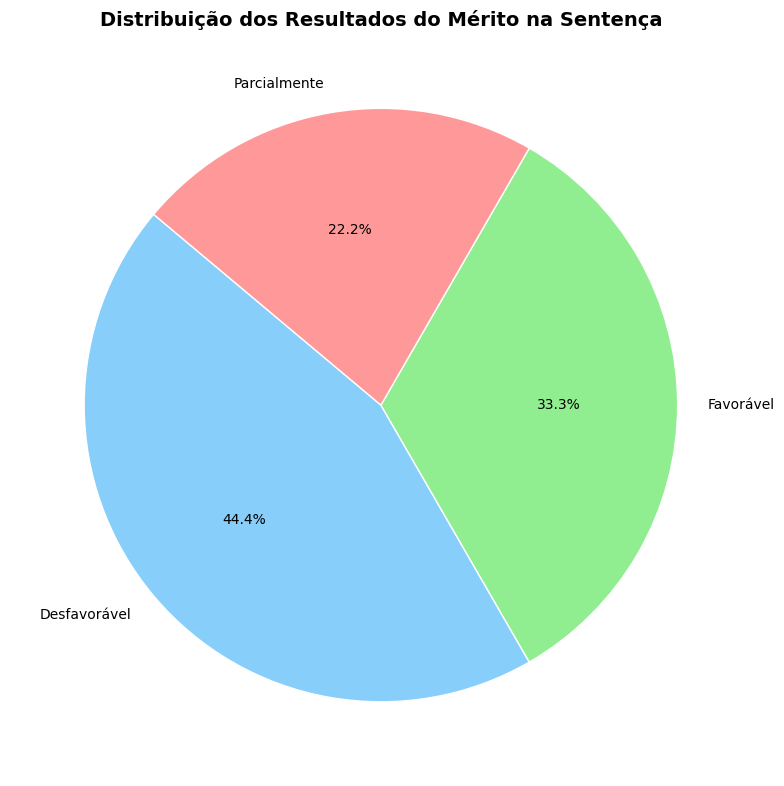

In [78]:
# Mapeamento reverso: de valores numéricos para rótulos
reverse_mapping = {1: "Favorável", 0.5: "Parcialmente", 0: "Desfavorável"}
metrics_merito_sentenca["Mérito na Sentença_Label"] = metrics_merito_sentenca["Mérito na Sentença"].map(reverse_mapping)

# Agrupar os dados pela nova coluna de rótulos
sentenca_counts = metrics_merito_sentenca["Mérito na Sentença_Label"].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    sentenca_counts,
    labels=sentenca_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=["#87CEFA", "#90EE90", "#FF9999"],  # Tons suaves: azul claro, verde claro, salmão
    wedgeprops={"edgecolor": "white"}  # Bordas brancas para melhor contraste
)

# Adicionar título estilizado
plt.title("Distribuição dos Resultados do Mérito na Sentença", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

#### Gráfico de Pizza para Empresa-Veículo

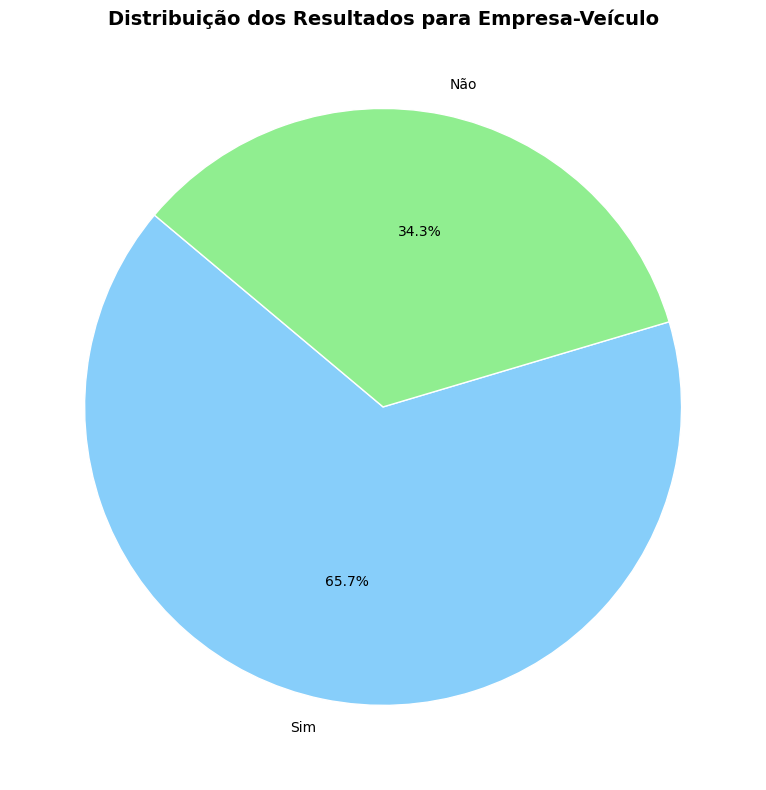

In [79]:
# Mapeamento reverso: de valores numéricos para rótulos
reverse_mapping = {1: "Sim", 0: "Não"}
metrics_empresa_veiculo["Empresa-Veículo_Label"] = metrics_empresa_veiculo["Empresa-Veículo"].map(reverse_mapping)

# Agrupar os dados pela nova coluna de rótulos
empresa_counts = metrics_empresa_veiculo["Empresa-Veículo_Label"].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    empresa_counts,
    labels=empresa_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=["#87CEFA", "#90EE90"],  # Azul claro e verde claro
    wedgeprops={"edgecolor": "white"}  # Bordas brancas entre os segmentos
)

# Adicionar título estilizado
plt.title("Distribuição dos Resultados para Empresa-Veículo", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

#### Gráfico de Linhas para Tempo Médio por Comarca

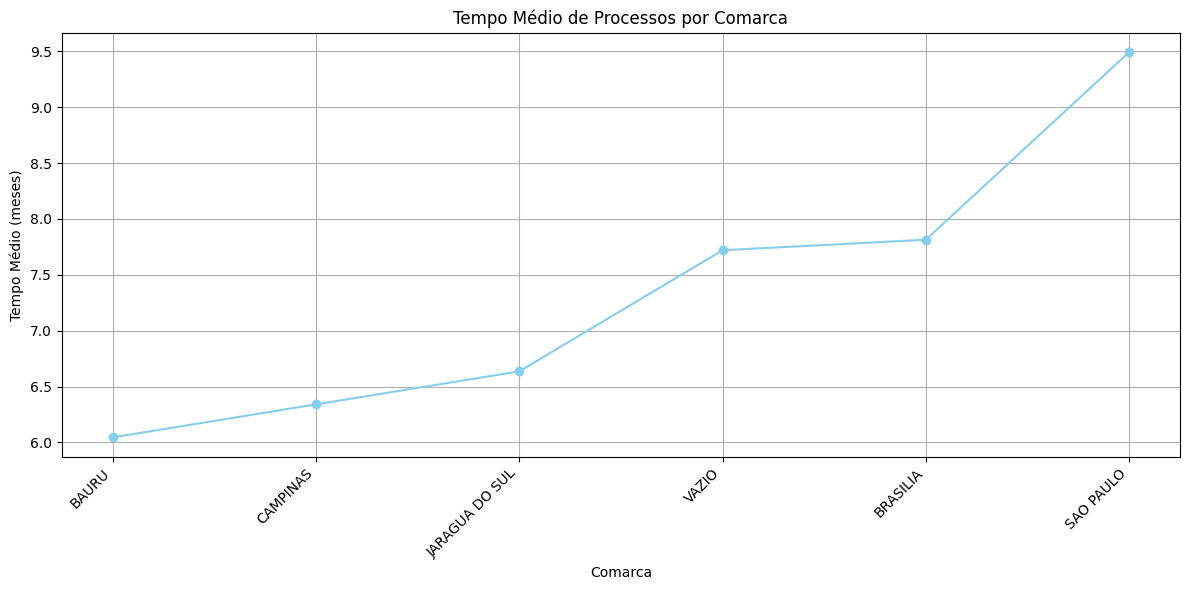

In [80]:
# Filtrar apenas as colunas necessárias e garantir que os valores sejam numéricos
casos["tempo_meses"] = pd.to_numeric(casos["tempo_meses"], errors="coerce")

# Calcular o tempo médio por comarca
tempo_por_comarca = casos.groupby("comarca")["tempo_meses"].mean().sort_values()

# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
tempo_por_comarca.plot(kind="line", marker="o", color="skyblue")
plt.title("Tempo Médio de Processos por Comarca")
plt.xlabel("Comarca")
plt.ylabel("Tempo Médio (meses)")
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Scatter Mapbox para Mérito Liminar/Tutela

In [87]:
# Agrupando os dados para obter o resultado mais frequente e as contagens por comarca
agrupado = casos.groupby('comarca').agg({
    'latitude': 'first',
    'longitude': 'first',
    'aparições_comarca': 'count',
    'Mérito Liminar/Tutela': lambda x: x.value_counts().idxmax()
}).reset_index()

# Contando o número de processos por categoria em cada comarca
contagem_resultados = casos.groupby(['comarca', 'Mérito Liminar/Tutela']).size().unstack(fill_value=0).reset_index()

# Mesclando as contagens ao DataFrame agrupado
agrupado = agrupado.merge(contagem_resultados, on='comarca', how='left')

# Criando a coluna de hover com os detalhes necessários
agrupado['hover_info'] = (
    "Comarca: " + agrupado['comarca'] +
    "<br>Quantidade Total de Processos: " + agrupado['aparições_comarca'].astype(str) +
    "<br>Favorável: " + agrupado.get('Favorável', 0).astype(str) +
    "<br>Desfavorável: " + agrupado.get('Desfavorável', 0).astype(str) +
    "<br>Parcialmente: " + agrupado.get('Parcialmente', 0).astype(str) +
    "<br>Vazio: " + agrupado.get('Vazio', 0).astype(str)
)

# Criando o scatter mapbox com os dados agrupados
fig = px.scatter_mapbox(
    agrupado,
    lat="latitude",
    lon="longitude",
    color="Mérito Liminar/Tutela",
    size="aparições_comarca",
    hover_name="comarca",
    hover_data={"hover_info": True},
    title="Distribuição de Casos por Comarca com Mérito Liminar/Tutela",
    mapbox_style="open-street-map",
    zoom=4,
    size_max=30,
    opacity=0.6,  # Tornando os círculos mais visíveis
    color_discrete_sequence=px.colors.sequential.Viridis
)

# Ajustando a legenda e o layout
fig.update_layout(
    legend_title_text="Resultado Mais Frequente",
    legend=dict(
        traceorder="normal",
        itemsizing='constant'
    )
)

# Exibindo o mapa
fig.show()

C:\Users\pietra.araujo\AppData\Local\Temp\ipykernel_13584\827319856.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Scatter Mapbox para Mérito na Sentença

In [88]:
# Agrupando os dados para obter o resultado mais frequente e as contagens por comarca
agrupado = casos.groupby('comarca').agg({
    'latitude': 'first',
    'longitude': 'first',
    'aparições_comarca': 'count',
    'Mérito na Sentença': lambda x: x.value_counts().idxmax()  # Agora para "Mérito na Sentença"
}).reset_index()

# Contando o número de processos por categoria em cada comarca para "Mérito na Sentença"
contagem_resultados = casos.groupby(['comarca', 'Mérito na Sentença']).size().unstack(fill_value=0).reset_index()

# Mesclando as contagens ao DataFrame agrupado
agrupado = agrupado.merge(contagem_resultados, on='comarca', how='left')

# Criando a coluna de hover com os detalhes necessários
agrupado['hover_info'] = (
    "Comarca: " + agrupado['comarca'] +
    "<br>Quantidade Total de Processos: " + agrupado['aparições_comarca'].astype(str) +
    "<br>Favorável: " + agrupado.get('Favorável', 0).astype(str) +
    "<br>Desfavorável: " + agrupado.get('Desfavorável', 0).astype(str) +
    "<br>Parcialmente: " + agrupado.get('Parcialmente', 0).astype(str) +
    "<br>Vazio: " + agrupado.get('Vazio', 0).astype(str)
)

# Criando o scatter mapbox com os dados agrupados
fig = px.scatter_mapbox(
    agrupado,
    lat="latitude",
    lon="longitude",
    color="Mérito na Sentença",  # Alterado para "Mérito na Sentença"
    size="aparições_comarca",
    hover_name="comarca",
    hover_data={"hover_info": True},
    title="Distribuição de Casos por Comarca com Mérito na Sentença",
    mapbox_style="open-street-map",
    zoom=4,
    size_max=30,
    opacity=0.6,  # Tornando os círculos mais visíveis
    color_discrete_sequence=px.colors.sequential.Viridis
)

# Ajustando a legenda e o layout
fig.update_layout(
    legend_title_text="Resultado Mais Frequente",
    legend=dict(
        traceorder="normal",
        itemsizing='constant'
    )
)

# Exibindo o mapa
fig.show()

C:\Users\pietra.araujo\AppData\Local\Temp\ipykernel_13584\280483975.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Scatter Mapbox para Mérito no Acórdão

In [89]:
# Agrupando os dados para obter o resultado mais frequente e as contagens por comarca
agrupado = casos.groupby('comarca').agg({
    'latitude': 'first',
    'longitude': 'first',
    'aparições_comarca': 'count',
    'Mérito no Acórdão': lambda x: x.value_counts().idxmax()  # Agora para "Mérito no Acórdão"
}).reset_index()

# Contando o número de processos por categoria em cada comarca para "Mérito no Acórdão"
contagem_resultados = casos.groupby(['comarca', 'Mérito no Acórdão']).size().unstack(fill_value=0).reset_index()

# Mesclando as contagens ao DataFrame agrupado
agrupado = agrupado.merge(contagem_resultados, on='comarca', how='left')

# Criando a coluna de hover com os detalhes necessários
agrupado['hover_info'] = (
    "Comarca: " + agrupado['comarca'] +
    "<br>Quantidade Total de Processos: " + agrupado['aparições_comarca'].astype(str) +
    "<br>Favorável: " + agrupado.get('Favorável', 0).astype(str) +
    "<br>Desfavorável: " + agrupado.get('Desfavorável', 0).astype(str) +
    "<br>Parcialmente: " + agrupado.get('Parcialmente', 0).astype(str) +
    "<br>Vazio: " + agrupado.get('Vazio', 0).astype(str)
)

# Criando o scatter mapbox com os dados agrupados
fig = px.scatter_mapbox(
    agrupado,
    lat="latitude",
    lon="longitude",
    color="Mérito no Acórdão",  # Alterado para "Mérito no Acórdão"
    size="aparições_comarca",
    hover_name="comarca",
    hover_data={"hover_info": True},
    title="Distribuição de Casos por Comarca com Mérito no Acórdão",
    mapbox_style="open-street-map",
    zoom=4,
    size_max=30,
    opacity=0.6,  # Tornando os círculos mais visíveis
    color_discrete_sequence=px.colors.sequential.Viridis
)

# Ajustando a legenda e o layout
fig.update_layout(
    legend_title_text="Resultado Mais Frequente",
    legend=dict(
        traceorder="normal",
        itemsizing='constant'
    )
)

# Exibindo o mapa
fig.show()

C:\Users\pietra.araujo\AppData\Local\Temp\ipykernel_13584\3977374387.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### Scatter Mapbox para Empresa-Veículo

In [85]:
# Convertendo aparições_comarca para numérico
casos['aparições_comarca'] = pd.to_numeric(casos['aparições_comarca'], errors='coerce')

# Removendo possíveis valores NaN após a conversão
casos = casos.dropna(subset=['aparições_comarca'])

# Convertendo colunas para string onde necessário
casos['Contribuinte'] = casos['Contribuinte'].astype(str)
casos['Número do Processo'] = casos['Número do Processo'].astype(str)
casos['Status'] = casos['Status'].astype(str)

# Garantindo que Empresa-Veículo só tenha valores 'Sim' ou 'Não'
casos['Empresa-Veículo'] = casos['Empresa-Veículo'].replace({
    None: 'Não',
    '': 'Não'
})
casos['Empresa-Veículo'] = pd.Categorical(
    casos['Empresa-Veículo'], categories=["Sim", "Não"], ordered=True
)

# Agrupando por comarca e calculando as contagens de 'Sim' e 'Não'
agrupado = casos.groupby(['comarca', 'latitude', 'longitude'])['Empresa-Veículo'].value_counts().unstack(fill_value=0).reset_index()
agrupado['cor'] = agrupado.apply(lambda x: 'Sim' if x['Sim'] > x['Não'] else 'Não', axis=1)
agrupado['size'] = agrupado['Sim'] + agrupado['Não']

# Criando o scatter mapbox com a cor definida pela maior contagem entre Sim e Não
fig = px.scatter_mapbox(
    agrupado,
    lat="latitude",
    lon="longitude",
    color="cor",
    size="size",
    hover_name="comarca",
    hover_data={
        "Sim": True,
        "Não": True,
        "latitude": False,
        "longitude": False
    },
    title="Distribuição de Processos por Comarca com Menção a Empresa-Veículo",
    mapbox_style="open-street-map",
    zoom=4,
    opacity=0.4,  # Tornando os círculos transparentes
    color_discrete_map={"Sim": "#1f77b4", "Não": "#ff7f0e"}  # Cores para Sim e Não
)

# Ajustando a legenda para clareza
fig.update_layout(
    legend_title_text="Predominância de Empresa-Veículo",
    legend=dict(
        traceorder="normal",
        itemsizing='constant'
    )
)

# Exibindo o mapa
fig.show()

## **Streamlit**

In [95]:
# Título do Aplicativo
st.title("Sistema HRSA - Ágio Interno e Empresa-Veículo")

# 1. Leitura da Base
st.header("1. Leitura da Base")
uploaded_file = st.file_uploader("Faça o upload do arquivo Excel com a base de dados:")
if uploaded_file:
    sheet_name = st.text_input("Digite o nome da planilha no arquivo:", value="Ágio")
    casos = pd.read_excel(uploaded_file, sheet_name=sheet_name)
    st.dataframe(casos.head())

    # 2. Tratamento da Base
    st.header("2. Tratamento da Base")
    with st.spinner("Realizando tratamento de dados..."):
        # Conversões de formato datetime
        date_columns = ['Data Liminar/Tutela', 'Sentença', 'Acórdão']
        for col in date_columns:
            if col in casos.columns:
                casos[col] = pd.to_datetime(casos[col], errors='coerce')

        # Tratamento de valores inconsistentes e preenchimento de nulos
        valores_inconsistentes = ["_", "N/A", None, np.nan]
        casos.replace(valores_inconsistentes, np.nan, inplace=True)
        casos.fillna("Vazio", inplace=True)

        # Normalização de colunas
        if 'Número do Processo' in casos.columns:
            casos['Número do Processo'] = casos['Número do Processo'].str.replace(r'[.-]', '', regex=True)

        if 'Cidade' in casos.columns:
            casos['comarca'] = casos['Cidade'].str.replace(r' - \w{2}$', '', regex=True)

        st.success("Tratamento concluído!")
        st.dataframe(casos.head())

    # 3. Feature Engineering: Duração dos Processos
    st.header("3. Feature Engineering: Duração dos Processos")
    def extrair_ano(num_proc):
        try:
            ano = int(num_proc[9:13])
            return ano if 1900 <= ano <= 2100 else np.nan
        except (ValueError, TypeError):
            return np.nan

    if 'Número do Processo' in casos.columns:
        casos['ano_processo'] = casos['Número do Processo'].apply(extrair_ano)
        casos['data_presumida'] = pd.to_datetime(casos['ano_processo'], format='%Y', errors='coerce')

    if 'Data Liminar/Tutela' in casos.columns:
        casos['tempo_meses'] = (casos['Data Liminar/Tutela'] - casos['data_presumida']).dt.days / 30.44

    st.write("Duração dos processos calculada:")
    st.dataframe(casos[['Número do Processo', 'data_presumida', 'Data Liminar/Tutela', 'tempo_meses']].head())

    # 4. Base Externa: Novas Colunas
    st.header("4. Base Externa: Novas Colunas")
    url_raw = "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-100-mun.json"
    comarcas = gpd.read_file(url_raw)
    comarcas = comarcas.rename(columns={"name": "comarca"})
    comarcas['latitude'] = comarcas['geometry'].centroid.y
    comarcas['longitude'] = comarcas['geometry'].centroid.x

    casos['comarca'] = casos['comarca'].apply(lambda x: unidecode(x).upper() if isinstance(x, str) else x)
    comarcas['comarca'] = comarcas['comarca'].apply(lambda x: unidecode(x).upper() if isinstance(x, str) else x)

    casos = casos.merge(comarcas, on="comarca", how="left")
    st.write("Base externa integrada:")
    st.dataframe(casos.head())

    # 5. Análises e Visualizações
    st.header("5. Análises e Visualizações")

    # Estatísticas Descritivas
    st.subheader("Estatísticas Descritivas")
    casos_cleaned = casos.replace(["Vazio", "VAZIO"], np.nan).dropna(how="all")

    def replace_nan_with_vazio(df):
        return df.fillna("Vazio")

    def map_categorical_to_numeric(data, column, mapping):
        if column in data.columns:
            data[column] = data[column].map(mapping)
        return data

    mapping = {"Favorável": 1, "Parcialmente": 0.5, "Desfavorável": 0}
    casos_cleaned = map_categorical_to_numeric(casos_cleaned, "Mérito Liminar/Tutela", mapping)
    casos_cleaned = map_categorical_to_numeric(casos_cleaned, "Mérito na Sentença", mapping)
    casos_cleaned = map_categorical_to_numeric(casos_cleaned, "Mérito no Acórdão", mapping)

    mapping = {"Sim": 1, "Não": 0}
    casos_cleaned = map_categorical_to_numeric(casos_cleaned, "Empresa-Veículo", mapping)

    # Gráficos de Barras
    st.subheader("Gráficos de Barras")
    contribuinte_full = replace_nan_with_vazio(
        casos_cleaned["Contribuinte"].value_counts().reset_index(name="Frequência").rename(columns={"index": "Contribuinte"})
    )

    top_contribuintes = contribuinte_full.sort_values(by="Frequência", ascending=False)
    fig, ax = plt.subplots()
    ax.bar(top_contribuintes["Contribuinte"], top_contribuintes["Frequência"], color="skyblue")
    ax.set_title("Top Contribuintes")
    plt.xticks(rotation=45, ha="right")
    st.pyplot(fig)

    natureza_full = replace_nan_with_vazio(
        casos_cleaned["Natureza"].value_counts().reset_index(name="Frequência").rename(columns={"index": "Natureza"})
    )

    top_naturezas = natureza_full.sort_values(by="Frequência", ascending=False)
    fig, ax = plt.subplots()
    ax.bar(top_naturezas["Natureza"], top_naturezas["Frequência"], color="skyblue")
    ax.set_title("Top Naturezas")
    plt.xticks(rotation=45, ha="right")
    st.pyplot(fig)

    # Gráficos de Pizza
    st.subheader("Gráficos de Pizza")
    for col, title in [
        ("Mérito Liminar/Tutela", "Distribuição do Mérito Liminar/Tutela"),
        ("Mérito na Sentença", "Distribuição do Mérito na Sentença"),
        ("Mérito no Acórdão", "Distribuição do Mérito no Acórdão"),
        ("Empresa-Veículo", "Distribuição de Empresa-Veículo"),
    ]:
        if col in casos_cleaned.columns:
            counts = casos_cleaned[col].value_counts()
            fig, ax = plt.subplots()
            ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
            ax.set_title(title)
            st.pyplot(fig)

    # Gráfico de Linha
    st.subheader("Gráfico de Linha")
    tempo_por_comarca = casos.groupby("comarca")["tempo_meses"].mean().sort_values()
    fig, ax = plt.subplots()
    tempo_por_comarca.plot(kind="line", marker="o", ax=ax, color="skyblue")
    ax.set_title("Tempo Médio de Processos por Comarca")
    plt.xticks(rotation=45, ha="right")
    st.pyplot(fig)

    # Mapas Interativos
    st.subheader("Mapas Interativos Scatter Mapbox")
    for col, title in [
        ("Mérito Liminar/Tutela", "Distribuição de Casos por Mérito Liminar/Tutela"),
        ("Mérito na Sentença", "Distribuição de Casos por Mérito na Sentença"),
        ("Mérito no Acórdão", "Distribuição de Casos por Mérito no Acórdão"),
        ("Empresa-Veículo", "Distribuição de Casos por Empresa-Veículo"),
    ]:
        if col in casos.columns and 'latitude' in casos.columns and 'longitude' in casos.columns:
            fig = px.scatter_mapbox(
                casos,
                lat="latitude",
                lon="longitude",
                color=col,
                size="aparições_comarca" if 'aparições_comarca' in casos.columns else None,
                hover_name="comarca",
                title=title,
                mapbox_style="open-street-map",
                zoom=4
            )
            st.plotly_chart(fig)

    st.success("Análises concluídas e apresentadas com sucesso!")

2024-12-19 08:46:54.174 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 08:46:54.175 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2024-12-19 08:46:54.175 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 08:46:54.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 08:46:54.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 08:46:54.177 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 08:46:54.177 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 08:46:54.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-19 08:46:54.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


#### Aplicativo em Streamlit
No momento, o app somente suporta bases com até 200 MB: https://huggingface.co/spaces/xValentim/provisionamento-deep-learning
